Был запущен сплит-тест (а/б-тест), направленный на улучшение платежной активности пользователей. Вам дан датасет с транзакциями пользователей до и во время теста в контрольной и тестовых группах
<br>
<br>
1. Какие вы можете сделать выводы? Какая группа показала лучшие результаты?
<br>
2. Можем ли мы как-то оценить из этих данных равномерность и валидность распределения юзеров по разным группам?
<br>
3. Если не ограничиваться теми данными, которые приведены в рамках этого задания, что ещё вы бы посчитали для оценки результатов групп?
<br>
<br>
Описание данных:
<br>
<br>
В таблице users_ приведена информация о том, какой юзер в какой момент времени попал в а/б тест:
<br>
tag - лэйбл группы (control - контрольная, остальные - тестовые)
<br>
ts - время, когда впервые был выдан tag. То есть, все события до наступления времени ts происходили с юзером до попадания в а/б тест
<br>
user_uid - внутренний id юзера (для матчинга со второй таблицей)
<br>
registration_time - время регистрации пользователя в сервисе
<br>
conv_ts - время совершения первой покупки пользователем в сервисе
<br>
<br>
В таблице purchases_ приведена информация о транзакциях пользователей из таблицы users_ до и во время а/б теста:
<br>
user_uid - внутренний id юзера (для матчинга со второй таблицей)
<br>
time - время совершения транзакции
<br>
consumption_mode - вид потребления контента (dto - единица контента куплена навсегда, rent - единица контента взята в аренду, subscription - оформлена подписка)
<br>
element_uid - уникальный id единицы контента или подписки
<br>
price - цена (преобразованная)
<br>
<br>
Значения в полях price и всех полях, указывающих на время - преобразованы. Это значит, что значение в таблице не настоящее, но является линейным преобразованием реального значения, где ко всем значениям одного поля применено одно и то же преобразование - между ними сохранено отношение порядка. Ко всем полям, обозначающим время, применено одно и то же преобразование.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
users = pd.read_csv('users_.csv')
users

,tag,ts,user_uid,registration_time,conv_ts
0,test4,30152.843868,001885550d78efd82c0f5cc02ad3369a,27410.154590,29485.529691
1,control,30133.146255,deb7d0e9bf9813d4f21b579d3703c6e1,27410.171795,27632.424734
2,test1,30140.447675,32095e22f853e595a0f407ad081e7da8,27410.217536,27414.028899
3,control,30136.790772,9932d33f40ad07d7f3ddb7c6aee1bc60,27410.227367,27573.751226
4,test2,30150.339264,4a122db1ad0214e969df154d2dbb4622,27410.230786,29545.833019
...,...,...,...,...,...
696977,test3,30135.048875,e10d8044e619248ed68e54bc9f78efa9,27410.028612,27640.573832
696978,test2,30144.864583,75c4da27fde4db78cf7e92e1847d1661,27410.037686,29293.210971
696979,test4,30157.801078,d679d86c76c03f86e1459bde6b582664,27410.050534,29633.843281
696980,test4,30140.139148,ca7d91f45bcc7eed9402a781e48cd6f5,27410.114820,27448.255112


Проверим корректность данных

In [55]:
users.nunique()

tag                       5
ts                   696500
user_uid             694819
registration_time    690641
conv_ts                2893
dtype: int64

In [49]:
users.groupby('user_uid').agg({'tag': 'nunique'}).tag.value_counts()

1    693358
2      1437
3        23
4         1
Name: tag, dtype: int64

У нас есть пользователи, которым присвоено 2, 3 и даже 4 тэга. Это пересечение, таких пользователей надо удалить из датасета. Они в сумме занимают 0.2% от общего числа юзеров.

In [75]:
with_1_tag = []
users.groupby('user_uid', as_index=False).agg({'tag': 'nunique'}).query("tag == 1")

,user_uid,tag
0,0000290ca105fab1223c088bf54b918c,1
1,0000531b60feb84cd57bff4b148f5d24,1
2,0000602749161524aedd04269957e5fc,1
3,000066786fe7af9c8ac458b4551dee26,1
4,000072bcb4ba240680daa158bcd4d045,1
...,...,...
694814,ffffab957993a6060f681d19dfac6579,1
694815,ffffc093e6ad8a606ade54eea7f821b1,1
694816,ffffc395f4f1fe23e6ab642f72d2be46,1
694817,ffffe9d7f6b4a76faf45d84c9032d5f5,1


In [76]:
[with_1_tag.append(i) for i in users.groupby('user_uid', as_index=False).agg({'tag': 'nunique'}).query("tag != 1").user_uid]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [77]:
with_1_tag

['0000290ca105fab1223c088bf54b918c',
 '0000531b60feb84cd57bff4b148f5d24',
 '0000602749161524aedd04269957e5fc',
 '000066786fe7af9c8ac458b4551dee26',
 '000072bcb4ba240680daa158bcd4d045',
 '0000e9e72d3714c9d4c5ad4b233ea6f5',
 '0000ea4c73178c4161f0bc93e3527ac2',
 '0000f7de0da68807dee816cf21cba94a',
 '0000f8b7f503589767ceb52927ebab4b',
 '00010a36e93591e62d770c72607f7dda',
 '0001220419a9db73d7ec59ddda2a48d7',
 '00012e7f0fe1c81ea915d97febd73111',
 '00013810b07623f09f93c710acdd62ad',
 '0001390b55321cdbc220f5894bb56c56',
 '00013d2aebdf9287892aec2a70343c77',
 '00016a14fe3fd271286153b28e58f6bc',
 '00017733df45bb08ee7abd44e6037cf7',
 '0001abe5e37506255c34408dd68bd599',
 '0001ba4a216a6327ea10b14a3b0cab48',
 '0001e78cfe0e2849795d327cbcf2f23e',
 '0002096303b8f2941374084d4e72dcf9',
 '000230bfee08d048fbf884eac2a256e7',
 '00023113db8c12681a62fe66578152b9',
 '00027d139abd3c7bd742aafd58fa6b57',
 '0002a45d0b45a78e9c920beba40bc7fb',
 '0002c408c59b058ab5f285afd22a5987',
 '0002c69a68993c210b53cfbb0449495e',
 

In [78]:
len(with_1_tag)

693358

In [79]:
users = users.query("user_uid not in @with_1_tag")
users

,tag,ts,user_uid,registration_time,conv_ts
0,test4,30152.843868,001885550d78efd82c0f5cc02ad3369a,27410.154590,29485.529691
1,control,30133.146255,deb7d0e9bf9813d4f21b579d3703c6e1,27410.171795,27632.424734
2,test1,30140.447675,32095e22f853e595a0f407ad081e7da8,27410.217536,27414.028899
3,control,30136.790772,9932d33f40ad07d7f3ddb7c6aee1bc60,27410.227367,27573.751226
4,test2,30150.339264,4a122db1ad0214e969df154d2dbb4622,27410.230786,29545.833019
...,...,...,...,...,...
696977,test3,30135.048875,e10d8044e619248ed68e54bc9f78efa9,27410.028612,27640.573832
696978,test2,30144.864583,75c4da27fde4db78cf7e92e1847d1661,27410.037686,29293.210971
696979,test4,30157.801078,d679d86c76c03f86e1459bde6b582664,27410.050534,29633.843281
696980,test4,30140.139148,ca7d91f45bcc7eed9402a781e48cd6f5,27410.114820,27448.255112


In [80]:
users.nunique()

tag                       5
ts                   693534
user_uid             693358
registration_time    689211
conv_ts                2893
dtype: int64

В датасете есть 635 человек, у которых несколько дат присвоения тэга. Исключим их

In [112]:
users.query("registration_time > ts")

,tag,ts,user_uid,registration_time,conv_ts
1308,control,30132.530282,509b44822a9ec9b6f96c01d118176faf,30244.874660,30046.187656
14137,test3,30144.708921,1cd7770bba07ac2dd5152751b5ac5aac,30238.227555,30142.347016
28157,test1,30132.469814,d6d1be3a09a0ca4bf42988176477d3df,30243.051099,29793.565608
28947,test1,30150.216191,b5bb0bd4fc9f3731f824dc854349706b,30246.250068,29831.051460
37621,test1,30140.000534,c5101de8fdfb1e3cc551e525f32e2a93,30245.979976,NaN
...,...,...,...,...,...
658315,control,30156.679669,a6522659b4767c3ba4c633b488859c31,30245.829571,NaN
672977,test1,30135.189462,cfcde41c21342d9c832c98ce94dfa206,30157.210560,29430.115823
678593,test4,30158.349019,bb4a90d22d55de54544108cf0bd11ec5,30201.924673,30155.385573
691061,control,30133.983285,5a2f92f89f349fb4565f5dc4d4ff09db,30236.433278,27531.375915


В датасете 141 человек, у которого дата регистрации меньше даты присвоения тэга. Исключим их

In [113]:
ts_before_reg = []
[ts_before_reg.append(i) for i in users.query("registration_time > ts").user_uid]
users = users.query("user_uid not in @ts_before_reg")

In [114]:
users

,tag,ts,user_uid,registration_time,conv_ts
0,test4,30152.843868,001885550d78efd82c0f5cc02ad3369a,27410.154590,29485.529691
1,control,30133.146255,deb7d0e9bf9813d4f21b579d3703c6e1,27410.171795,27632.424734
2,test1,30140.447675,32095e22f853e595a0f407ad081e7da8,27410.217536,27414.028899
3,control,30136.790772,9932d33f40ad07d7f3ddb7c6aee1bc60,27410.227367,27573.751226
4,test2,30150.339264,4a122db1ad0214e969df154d2dbb4622,27410.230786,29545.833019
...,...,...,...,...,...
696977,test3,30135.048875,e10d8044e619248ed68e54bc9f78efa9,27410.028612,27640.573832
696978,test2,30144.864583,75c4da27fde4db78cf7e92e1847d1661,27410.037686,29293.210971
696979,test4,30157.801078,d679d86c76c03f86e1459bde6b582664,27410.050534,29633.843281
696980,test4,30140.139148,ca7d91f45bcc7eed9402a781e48cd6f5,27410.114820,27448.255112


In [121]:
users.groupby('user_uid') \
    .agg({'tag': 'count', 'ts': 'count', 'registration_time': 'count', 'conv_ts': 'count'}) \
    .query("tag > 1 or ts > 1 or registration_time > 1 or conv_ts > 1")

,tag,ts,registration_time,conv_ts
user_uid,,,,
0017907e998a1a399b006737fdb5703c,2,2,2,2
00be09a9a3ffd4e5230bd907862cf582,2,2,2,2
012826c9c95c88c563f7ed8dd180fc40,2,2,2,2
018c2149067ae952c3140751d5381b36,2,2,2,2
0221fb5813f6a661b888529f01adceb8,2,2,2,2
...,...,...,...,...
fc615a35e4342f80e1122cb36ebd080f,2,2,2,2
fd9cccdc45f7f8a0e71e5a15b8d768ce,2,2,2,2
fec3e49e14a3ea64d6ea3c536cf0bdcf,2,2,2,2


In [131]:
users.groupby('user_uid').agg({'registration_time': 'nunique'}).registration_time.value_counts()

1    692744
0       473
Name: registration_time, dtype: int64

In [133]:
users.groupby('user_uid').agg({'ts': 'nunique'}).ts.value_counts()

1    692582
2       617
3        18
Name: ts, dtype: int64

In [134]:
users.groupby('user_uid').agg({'conv_ts': 'nunique'}).conv_ts.value_counts()

1    692975
0       242
Name: conv_ts, dtype: int64

Получается, есть юзеры, по которым произошли дубли - их 635. Им присваивались те же тэги, но более одного раза в разные даты. Оставим самое раннее добавление.

In [142]:
users = users.sort_values('ts').drop_duplicates(subset=['user_uid', 'tag'])
users.groupby('user_uid') \
    .agg({'tag': 'count', 'ts': 'count', 'registration_time': 'count', 'conv_ts': 'count'}) \
    .query("tag > 1 or ts > 1 or registration_time > 1 or conv_ts > 1")

,tag,ts,registration_time,conv_ts
user_uid,,,,


In [143]:
users

,tag,ts,user_uid,registration_time,conv_ts
579784,test1,30132.310512,3807fcecc8aa52ce7372428f012e07f7,28342.464393,29625.694182
78153,test4,30132.310515,3e43107d2ef71e6193c0c17b823d7fc7,28548.288255,30036.408738
688268,test1,30132.310518,17b970007a7de34840553d8580f7b70f,27162.684422,29474.120954
663569,test4,30132.310518,c4a3b1c9ba0bfa94dd716c7bdfc88f4a,26613.915607,29954.917754
326167,control,30132.310521,a0325c4301a33dbc53682f67b2fc53dc,29688.757546,30106.490983
...,...,...,...,...,...
154758,test2,30158.508480,2a3d5dcfc68082de47adc60ed31355f2,29016.189202,29024.290727
4865,test3,30158.508510,65ee7ed0e2a18b6557284781497b5e58,27531.001142,28193.082698
37454,test3,30158.508648,e79a73034a51fa6da37994591f5299f6,28127.390669,29055.257300
217749,test1,30158.508659,cc8efddd0c1955e731f006e809887d2b,29390.601947,29417.077266


In [144]:
users.nunique()

tag                       5
ts                   692740
user_uid             693217
registration_time    689070
conv_ts                2887
dtype: int64

В целом предобработка датасета юзерс закончена

Теперь посмотрим на равномерность и валидность выборок

In [145]:
users.tag.value_counts(normalize=True)

test1      0.201003
test2      0.199988
test4      0.199805
test3      0.199776
control    0.199428
Name: tag, dtype: float64

В каждой из 5 групп находится примерно 20% трафика, соответственно распределение юзеров примерно одинаковое

In [88]:
purchases = pd.read_csv('purchases_.csv')
purchases

,user_uid,time,consumption_mode,element_uid,price
0,d60a7038c7b7e99146ffea6f6535862b,30158.645112,dto,2ba66ac9785731da67b2b6155efaca5c,44.470588
1,0906074e1a1a9229b5e749860b646962,30158.645015,dto,e56d422275d90c96762f81db85d80f3d,38.588235
2,efb6eeca3135d573739e5c5d4dbce330,30158.644990,dto,544f7dd31bd61558c9c738adcff6aafa,50.352941
3,ccd658e372645c991ce49b444839712f,30158.644789,dto,8256d0fc7b25382aacfec0066e39cde3,44.470588
4,89ae5e43ff7b89f9d262d507dedc1760,30158.644200,dto,a579f32b5c116624cc661c9d3b96d5e5,44.470588
...,...,...,...,...,...
663844,b95eb8746f20dba6ddc804a382b0763a,30106.491242,rent,f17e9ea5412551ddb4b258595413f98c,26.823529
663845,facc4c49dd6e6bccd77be41845297f2a,30106.491145,dto,0ccd083bb2e44eeed4d6e2b6ca86a480,44.470588
663846,f81a8bf7f6d136108da82dcf0b8e1141,30106.491129,rent,7bbdee0cb298b62ab4766241d2fb477d,26.823529
663847,0ffbe5d7a89472510b757f4c674c3b4d,30106.491029,dto,5aa724c0393087cde3a18c625b310645,21.058824


In [199]:
df = users.merge(purchases, on='user_uid', how='left')

In [149]:
df_before = df.query("time < ts")
df_before

,user_uid,time,consumption_mode,element_uid,price,tag,ts,registration_time,conv_ts
2168,47887f5c77b3d59bdeac7ea2dfae5440,30158.469706,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,44.470588,test4,30158.490896,29491.814333,29514.866445
2619,77a6adeee9482635a4578bf9ff43411d,30158.447371,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,32.705882,test4,30158.475808,30147.110046,30145.606655
2717,67dbc7114a9fa1f8f62c6c030b586cc0,30158.442999,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,44.470588,test3,30158.457171,28920.762542,29464.342036
3363,90222a28313c7669f7e7b402db7c4b7e,30158.421029,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,44.470588,test4,30158.483041,29980.822288,30049.447295
3543,87ea8a6074a82e6e7b24babd38b32eef,30158.413775,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,44.470588,control,30158.421075,30075.494512,30078.784049
...,...,...,...,...,...,...,...,...,...
663844,b95eb8746f20dba6ddc804a382b0763a,30106.491242,rent,f17e9ea5412551ddb4b258595413f98c,26.823529,control,30139.006243,29016.080751,29016.141628
663845,facc4c49dd6e6bccd77be41845297f2a,30106.491145,dto,0ccd083bb2e44eeed4d6e2b6ca86a480,44.470588,test2,30137.355634,30006.783108,30025.000000
663846,f81a8bf7f6d136108da82dcf0b8e1141,30106.491129,rent,7bbdee0cb298b62ab4766241d2fb477d,26.823529,control,30135.729948,26590.914184,27130.440278
663847,0ffbe5d7a89472510b757f4c674c3b4d,30106.491029,dto,5aa724c0393087cde3a18c625b310645,21.058824,control,30132.374912,28945.980910,29164.455218


Посмотрим на средний чек

In [150]:
df_before.groupby('tag').agg({'price': 'mean'})

,price
tag,
control,35.981608
test1,35.908716
test2,35.867381
test3,35.876060
test4,35.947715


<AxesSubplot:xlabel='tag', ylabel='price'>

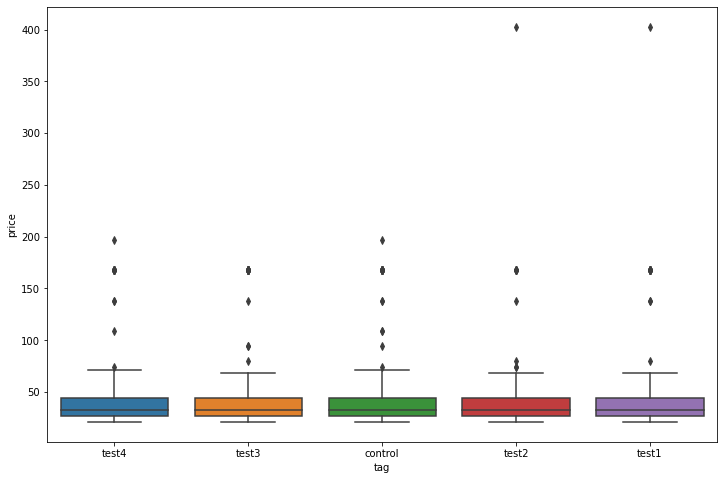

In [153]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_before, x='tag', y='price')

<Figure size 1152x864 with 0 Axes>

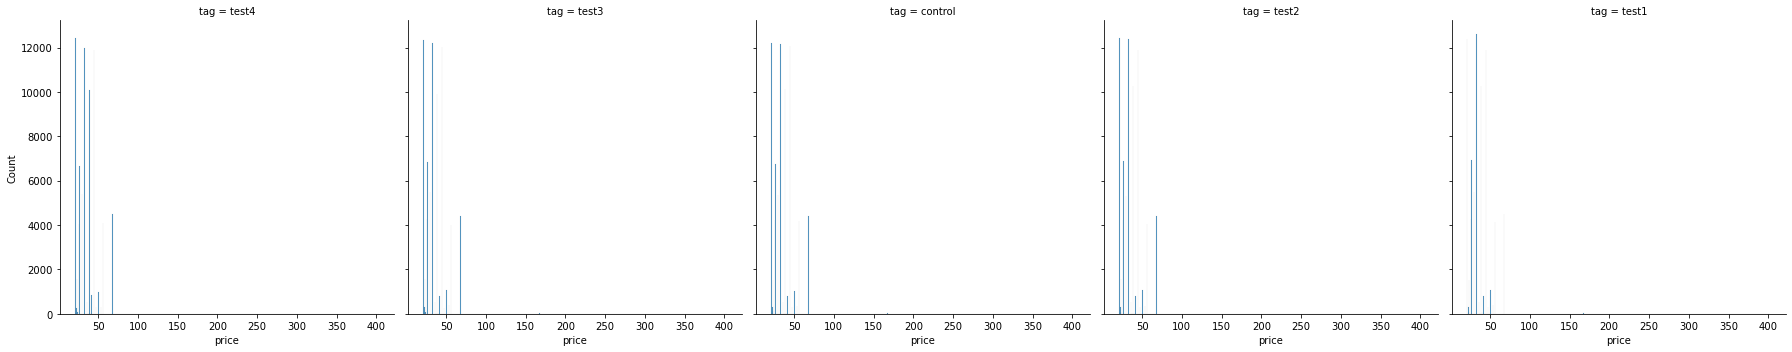

In [163]:
plt.figure(figsize=(16,12))
sns.displot(df_before, x='price', col='tag')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

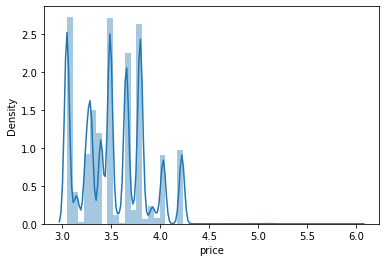

In [167]:
sns.distplot(np.log(df_before.price))

In [168]:
df_before['log_price'] = np.log(df_before['price'])

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\36361338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['log_price'] = np.log(df_before['price'])


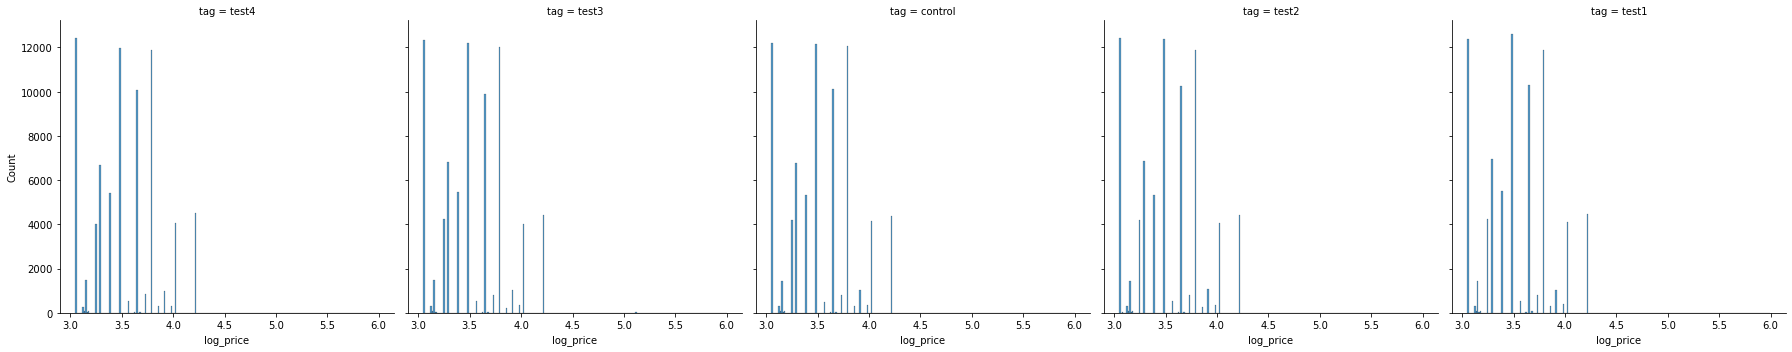

In [170]:
sns.displot(df_before, x='log_price', col='tag')

Распределения визуально явно отличаются от нормальных. Проведем статистический тест. НЕ ЗАБЫТЬ ПРОСТАВИТЬ ВЕЗДЕ КВЕРИ ТАЙМ БОЛЬШЕ НУЛЯ

In [173]:
from scipy import stats

In [179]:
stats.shapiro(df_before.query("tag == 'control'").price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9042722582817078, pvalue=1.5786169703542232e-24)

In [180]:
stats.shapiro(df_before.query("tag == 'test1'").price.sample(1000, random_state=17))

ShapiroResult(statistic=0.8947157859802246, pvalue=1.3715530128625122e-25)

In [182]:
stats.shapiro(df_before.query("tag == 'test2'").price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9024712443351746, pvalue=9.82467980353397e-25)

In [183]:
stats.shapiro(df_before.query("tag == 'test3'").price.sample(1000, random_state=17))

ShapiroResult(statistic=0.8572001457214355, pvalue=3.7818433074993814e-29)

In [184]:
stats.shapiro(df_before.query("tag == 'test4'").price.sample(1000, random_state=17))

ShapiroResult(statistic=0.897996723651886, pvalue=3.110863118977745e-25)

Распределения для всех групп значимо отличаются от нормального

In [185]:
stats.levene(df_before.query("tag == 'control'").price,
            df_before.query("tag == 'test1'").price,
            df_before.query("tag == 'test2'").price,
            df_before.query("tag == 'test3'").price,
            df_before.query("tag == 'test4'").price)

LeveneResult(statistic=1.5548201969628774, pvalue=0.18336218361429715)

Требование к гомогенности дисперсий соблюдается. Тем не менее используем непараметрический тест Краскела-Уоллиса из-за ненормальности распределения

In [186]:
stats.kruskal(df_before.query("tag == 'control'").price,
            df_before.query("tag == 'test1'").price,
            df_before.query("tag == 'test2'").price,
            df_before.query("tag == 'test3'").price,
            df_before.query("tag == 'test4'").price)

KruskalResult(statistic=4.600298363568692, pvalue=0.3308197851112013)

Пи-велью выше альфы (0.05), значит не можем отвергнуть гипотезу о различиях. Распределение по среднему чеку равномерно

Посмотрим на конверсию в предпериоде. Оставим тех, у кого совершение транзакции произошло до присвоения тега, а также тех, кто зарегистрировался до начала тестирования, но не совершил транзакций до начала теста

In [203]:
df.ts.min()

30132.31051184637

In [207]:
df_before = df.query("time < ts or registration_time < 30132.31051184637 and time.isnull()")
df_before

,tag,ts,user_uid,registration_time,conv_ts,time,consumption_mode,element_uid,price
0,test1,30132.310512,3807fcecc8aa52ce7372428f012e07f7,28342.464393,29625.694182,30128.266165,dto,1453b8da7c9ca23c4b8c9158b2ecbcda,21.058824
1,test4,30132.310515,3e43107d2ef71e6193c0c17b823d7fc7,28548.288255,30036.408738,NaN,NaN,NaN,NaN
2,test1,30132.310518,17b970007a7de34840553d8580f7b70f,27162.684422,29474.120954,NaN,NaN,NaN,NaN
3,test4,30132.310518,c4a3b1c9ba0bfa94dd716c7bdfc88f4a,26613.915607,29954.917754,NaN,NaN,NaN,NaN
4,control,30132.310521,a0325c4301a33dbc53682f67b2fc53dc,29688.757546,30106.490983,30130.388409,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,32.705882
...,...,...,...,...,...,...,...,...,...
1059938,test2,30158.508480,2a3d5dcfc68082de47adc60ed31355f2,29016.189202,29024.290727,NaN,NaN,NaN,NaN
1059939,test3,30158.508510,65ee7ed0e2a18b6557284781497b5e58,27531.001142,28193.082698,30130.741053,rent,c182cf88cc73c97dc744c9a66cb247ae,26.823529
1059940,test3,30158.508648,e79a73034a51fa6da37994591f5299f6,28127.390669,29055.257300,30145.406306,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,44.470588
1059941,test1,30158.508659,cc8efddd0c1955e731f006e809887d2b,29390.601947,29417.077266,NaN,NaN,NaN,NaN


In [212]:
df_before.query("registration_time > 30132.31051184637").query("time > ts")

,tag,ts,user_uid,registration_time,conv_ts,time,consumption_mode,element_uid,price


Теперь ниже чтобы проставить 0 и 1 для конверсии надо понять есть ли такое что по одному юзеру есть строчка с нан и с оплатой. Хотя возможно это и не нужно, потому что если есть хоть одна оплата, то уже не будет нан.

In [218]:
df_before['converted'] = np.where(df_before['time'] > 0, 1, 0)

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\2955798201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['converted'] = np.where(df_before['time'] > 0, 1, 0)


In [219]:
df_before

,tag,ts,user_uid,registration_time,conv_ts,time,consumption_mode,element_uid,price,converted
0,test1,30132.310512,3807fcecc8aa52ce7372428f012e07f7,28342.464393,29625.694182,30128.266165,dto,1453b8da7c9ca23c4b8c9158b2ecbcda,21.058824,1
1,test4,30132.310515,3e43107d2ef71e6193c0c17b823d7fc7,28548.288255,30036.408738,NaN,NaN,NaN,NaN,0
2,test1,30132.310518,17b970007a7de34840553d8580f7b70f,27162.684422,29474.120954,NaN,NaN,NaN,NaN,0
3,test4,30132.310518,c4a3b1c9ba0bfa94dd716c7bdfc88f4a,26613.915607,29954.917754,NaN,NaN,NaN,NaN,0
4,control,30132.310521,a0325c4301a33dbc53682f67b2fc53dc,29688.757546,30106.490983,30130.388409,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,32.705882,1
...,...,...,...,...,...,...,...,...,...,...
1059938,test2,30158.508480,2a3d5dcfc68082de47adc60ed31355f2,29016.189202,29024.290727,NaN,NaN,NaN,NaN,0
1059939,test3,30158.508510,65ee7ed0e2a18b6557284781497b5e58,27531.001142,28193.082698,30130.741053,rent,c182cf88cc73c97dc744c9a66cb247ae,26.823529,1
1059940,test3,30158.508648,e79a73034a51fa6da37994591f5299f6,28127.390669,29055.257300,30145.406306,subscription,dd7f3f7b10fb9b502cbc5d1a9abc067b,44.470588,1
1059941,test1,30158.508659,cc8efddd0c1955e731f006e809887d2b,29390.601947,29417.077266,NaN,NaN,NaN,NaN,0


In [223]:
df_before.nunique()

tag                       5
ts                   626175
user_uid             626557
registration_time    623402
conv_ts                2887
time                 383537
consumption_mode          3
element_uid            6001
price                    46
converted                 2
dtype: int64

In [224]:
df_before_conv = df_before.groupby('user_uid', as_index=False).agg({'tag': 'max', 'converted': 'max'})
df_before_conv

,user_uid,tag,converted
0,0000290ca105fab1223c088bf54b918c,test4,0
1,0000531b60feb84cd57bff4b148f5d24,test4,0
2,0000602749161524aedd04269957e5fc,test4,1
3,000066786fe7af9c8ac458b4551dee26,test2,0
4,000072bcb4ba240680daa158bcd4d045,test1,0
...,...,...,...
626552,ffffab957993a6060f681d19dfac6579,test3,0
626553,ffffc093e6ad8a606ade54eea7f821b1,test4,1
626554,ffffc395f4f1fe23e6ab642f72d2be46,control,0
626555,ffffe9d7f6b4a76faf45d84c9032d5f5,test1,0


In [227]:
df_before_conv.groupby('tag').agg({'converted': 'mean'})

,converted
tag,
control,0.367002
test1,0.370352
test2,0.367387
test3,0.366780
test4,0.366054


In [191]:
from scipy.stats import chi2_contingency, chi2 

In [226]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_before_conv.tag, df_before_conv.converted))
stat, p

(5.943631014946591, 0.203397678147129)

Конверсии статистически не отличаются. Распределение равномерно и валидно

Теперь смотрим эксперимент. Метрики - конверсия в транзакцию, средний чек, арпу, арппу, конверсия в каждый тип транзакции, конверсия в повторную покупку

Оставим данные по тем юзерам, которые совершили транзакцию после присвоения тега, а также тех, кто не совершил транзакции (вне зависимости от времени регистрации, так как зарегестрировавшиеся до начала эксперимента могли сконвертироваться в ходе теста)

In [231]:
df_after = df.query("time > ts or time.isnull()")
df_after

,tag,ts,user_uid,registration_time,conv_ts,time,consumption_mode,element_uid,price
1,test4,30132.310515,3e43107d2ef71e6193c0c17b823d7fc7,28548.288255,30036.408738,NaN,NaN,NaN,NaN
2,test1,30132.310518,17b970007a7de34840553d8580f7b70f,27162.684422,29474.120954,NaN,NaN,NaN,NaN
3,test4,30132.310518,c4a3b1c9ba0bfa94dd716c7bdfc88f4a,26613.915607,29954.917754,NaN,NaN,NaN,NaN
7,control,30132.310522,17250fbf4fa71b476745bcd7ba9ca2c5,29835.669735,29834.311099,NaN,NaN,NaN,NaN
8,control,30132.310527,42da75b249e981f185ba24a78b79bb8f,25873.682072,25873.781408,30135.547423,rent,6a5064ea3c87c56be05c3fdb85c45b14,26.823529
...,...,...,...,...,...,...,...,...,...
1059936,test1,30158.508308,ee83f54307536d016f49949559b2c39d,29388.961386,29392.629971,NaN,NaN,NaN,NaN
1059937,test3,30158.508421,af59dfe5815ba28b44ec29bb7ef37704,28831.676539,28929.761186,NaN,NaN,NaN,NaN
1059938,test2,30158.508480,2a3d5dcfc68082de47adc60ed31355f2,29016.189202,29024.290727,NaN,NaN,NaN,NaN
1059941,test1,30158.508659,cc8efddd0c1955e731f006e809887d2b,29390.601947,29417.077266,NaN,NaN,NaN,NaN


In [232]:
df_after['converted'] = np.where(df_after['time'] > 0, 1, 0)

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\1009993082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after['converted'] = np.where(df_after['time'] > 0, 1, 0)


In [233]:
df_after_conv = df_after.groupby('user_uid', as_index=False).agg({'tag': 'max', 'converted': 'max'})
df_after_conv

,user_uid,tag,converted
0,0000290ca105fab1223c088bf54b918c,test4,0
1,0000531b60feb84cd57bff4b148f5d24,test4,0
2,000066786fe7af9c8ac458b4551dee26,test2,0
3,000072bcb4ba240680daa158bcd4d045,test1,0
4,0000e9e72d3714c9d4c5ad4b233ea6f5,test4,0
...,...,...,...
552925,ffffab957993a6060f681d19dfac6579,test3,0
552926,ffffc093e6ad8a606ade54eea7f821b1,test4,1
552927,ffffc395f4f1fe23e6ab642f72d2be46,control,0
552928,ffffe9d7f6b4a76faf45d84c9032d5f5,test1,0


In [234]:
df_after_conv.groupby('tag').agg({'converted': 'mean'})

,converted
tag,
control,0.272567
test1,0.282200
test2,0.279243
test3,0.279867
test4,0.279995


In [235]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv.tag, df_after_conv.converted))
stat, p

(29.10809023291442, 7.431934456721552e-06)

Конверсии статистически значимо отличаются. Посмотрим, в каких группах есть это различие - проведем попарные сравнения. Но так как при попарных сравнениях растет вероятность ошибки первого рода - применим поправку Бонферони (для каждой пары стат значимость различий подтверждается не при p-value ниже альфы 0.05, а при p-value ниже альфы, деленной на кол-во всех попарных сравнений). Так как у нас 5 групп, то совершается 10 попарных сравнений (при этом мы будем смотреть только разницу каждого теста с контролем). Соответственно, пи-велью для каждого попарного сравнения должен быть ниже 0.005

In [236]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv.query("tag == 'control' or tag == 'test1'").tag, 
                                                      df_after_conv.query("tag == 'control' or tag == 'test1'").converted))
stat, p

(25.5018476646698, 4.4195946972815293e-07)

In [237]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv.query("tag == 'control' or tag == 'test2'").tag, 
                                                      df_after_conv.query("tag == 'control' or tag == 'test2'").converted))
stat, p

(12.259663709962581, 0.0004628549141711891)

In [238]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv.query("tag == 'control' or tag == 'test3'").tag, 
                                                      df_after_conv.query("tag == 'control' or tag == 'test3'").converted))
stat, p

(14.65312886438543, 0.00012921995592654408)

In [239]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv.query("tag == 'control' or tag == 'test4'").tag, 
                                                      df_after_conv.query("tag == 'control' or tag == 'test4'").converted))
stat, p

(15.174635388313424, 9.80111471792307e-05)

В каждой группе конверсия выросла значимо. Написать процент, на сколько изменилась. 

Посмотрим на конверсию в повторную покупку

In [313]:
df_after_conv2 = df_after.query("time > 0").groupby("user_uid", as_index=False).agg({'tag': 'max', 'price': 'count'})

In [316]:
df_after_conv2['converted'] = np.where(df_after_conv2['price'] > 1, 1, 0)

In [318]:
df_after_conv2.groupby('tag').agg({'converted': 'mean'})

,converted
tag,
control,0.369491
test1,0.384007
test2,0.385658
test3,0.385236
test4,0.389272


In [319]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv2.tag, df_after_conv2.converted))
stat, p

(29.95921140869626, 4.988913344066713e-06)

Отличия значимы. Так же, как и с конверсией в первую транзакцию, сделаем попарные сравнения, помня, что уровень значимости теперь 0.005

In [321]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv2.query("tag == 'control' or tag == 'test1'").tag, 
                                                      df_after_conv2.query("tag == 'control' or tag == 'test1'").converted))
stat, p

(13.66734808177933, 0.0002182158987650763)

In [322]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv2.query("tag == 'control' or tag == 'test2'").tag, 
                                                      df_after_conv2.query("tag == 'control' or tag == 'test2'").converted))
stat, p

(16.832382381140118, 4.083060139078273e-05)

In [323]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv2.query("tag == 'control' or tag == 'test3'").tag, 
                                                      df_after_conv2.query("tag == 'control' or tag == 'test3'").converted))
stat, p

(15.986181106083436, 6.380653138792553e-05)

In [324]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_conv2.query("tag == 'control' or tag == 'test4'").tag, 
                                                      df_after_conv2.query("tag == 'control' or tag == 'test4'").converted))
stat, p

(25.216551471864047, 5.124055699640377e-07)

В каждой группе конверсия в повторную транзакцию стат значимо выросла. УКАЗАТЬ ПРОЦЕНТЫ

Посмотрим на конверсии в каждый тип транзакций. Начнем с покупки.

In [352]:
df_after_dto = df_after
df_after_dto['converted'] = np.where(df_after_dto['consumption_mode'] == 'dto', 1, 0)

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\567986770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_dto['converted'] = np.where(df_after_dto['consumption_mode'] == 'dto', 1, 0)


In [356]:
df_after_dto.groupby('user_uid', as_index=False) \
    .agg({'tag': 'max', 'converted': 'max'}) \
    .groupby('tag', as_index=False) \
    .agg({'converted': 'mean'}) \
    .rename(columns={'converted': 'conversion_dto'})

,tag,conversion_dto
0,control,0.105478
1,test1,0.116516
2,test2,0.114081
3,test3,0.115810
4,test4,0.118778


In [357]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_dto.converted, df_after_dto.tag))
stat, p

(179.0250031137665, 1.207599933535614e-37)

Посмотрим на различия между группами, помня, что уровень значимости теперь 0.005

In [358]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_dto.query("tag == 'control' or tag == 'test1'").converted,
                                                      df_after_dto.query("tag == 'control' or tag == 'test1'").tag))
stat, p

(89.92855180686601, 2.4691782788423225e-21)

In [359]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_dto.query("tag == 'control' or tag == 'test2'").converted,
                                                      df_after_dto.query("tag == 'control' or tag == 'test2'").tag))
stat, p

(79.91891153015595, 3.9009492007367604e-19)

In [360]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_dto.query("tag == 'control' or tag == 'test3'").converted,
                                                      df_after_dto.query("tag == 'control' or tag == 'test3'").tag))
stat, p

(97.36518734217037, 5.76507630798773e-23)

In [361]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_dto.query("tag == 'control' or tag == 'test4'").converted,
                                                      df_after_dto.query("tag == 'control' or tag == 'test4'").tag))
stat, p

(158.7836002618773, 2.0865230287104746e-36)

Конверсия в покупку стат значимо отличается в каждой группе. УКАЗАТЬ ПРОЦЕНТЫ

Посмотрим на конверсию в аренду

In [363]:
df_after_rent = df_after
df_after_rent['converted'] = np.where(df_after_dto['consumption_mode'] == 'rent', 1, 0)

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\1208749635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_rent['converted'] = np.where(df_after_dto['consumption_mode'] == 'rent', 1, 0)


In [366]:
df_after_rent.groupby('user_uid', as_index=False) \
    .agg({'tag': 'max', 'converted': 'max'}) \
    .groupby('tag', as_index=False) \
    .agg({'converted': 'mean'}) \
    .rename(columns={'converted': 'conversion_rent'})

,tag,conversion_rent
0,control,0.104192
1,test1,0.106331
2,test2,0.107259
3,test3,0.105990
4,test4,0.105014


In [367]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_rent.converted, df_after_rent.tag))
stat, p

(9.453532170086795, 0.0507108647381474)

Пи-велью выше уровня значимости. Не можем утверждать, что есть различия между конверсиями в аренду хотя бы в одной группе

Посмотрим на конверсию в приобретение подписки

In [368]:
df_after_sub = df_after
df_after_sub['converted'] = np.where(df_after_sub['consumption_mode'] == 'subscription', 1, 0)

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\1106201569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_sub['converted'] = np.where(df_after_sub['consumption_mode'] == 'subscription', 1, 0)


In [369]:
df_after_sub.groupby('user_uid', as_index=False) \
    .agg({'tag': 'max', 'converted': 'max'}) \
    .groupby('tag', as_index=False) \
    .agg({'converted': 'mean'}) \
    .rename(columns={'converted': 'conversion_sub'})

,tag,conversion_sub
0,control,0.133112
1,test1,0.135463
2,test2,0.133608
3,test3,0.135421
4,test4,0.132885


In [370]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_after_sub.converted, df_after_sub.tag))
stat, p

(4.784118629661563, 0.31017391881954853)

Конверсия в подписку значимо не изменилась

Посмотрим на средний чек.

In [277]:
df_after.groupby('tag').agg({'price': 'mean'})

,price
tag,
control,38.616734
test1,38.275999
test2,38.401754
test3,38.320944
test4,38.175202


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

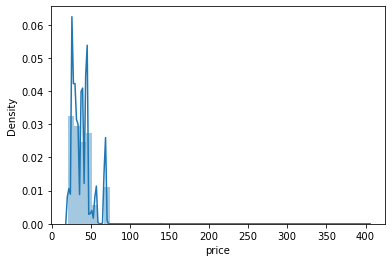

In [240]:
sns.distplot(df_after.price)

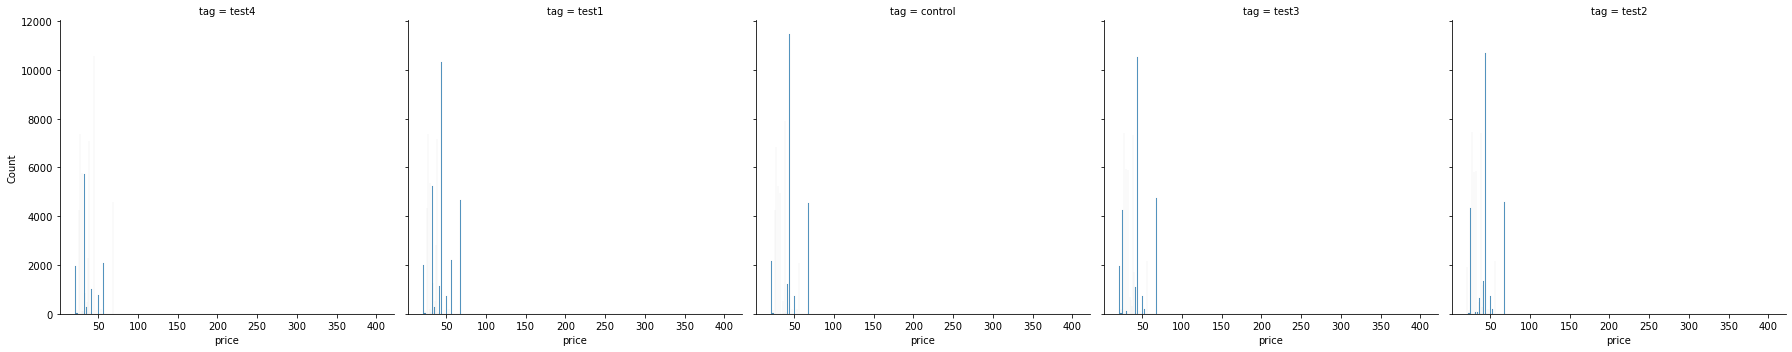

In [241]:
sns.displot(df_after, x='price', col='tag')

In [242]:
df_after['log_price'] = np.log(df_after['price'])

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\3494988419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after['log_price'] = np.log(df_after['price'])


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

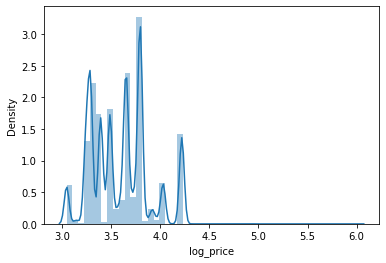

In [243]:
sns.distplot(df_after.log_price)

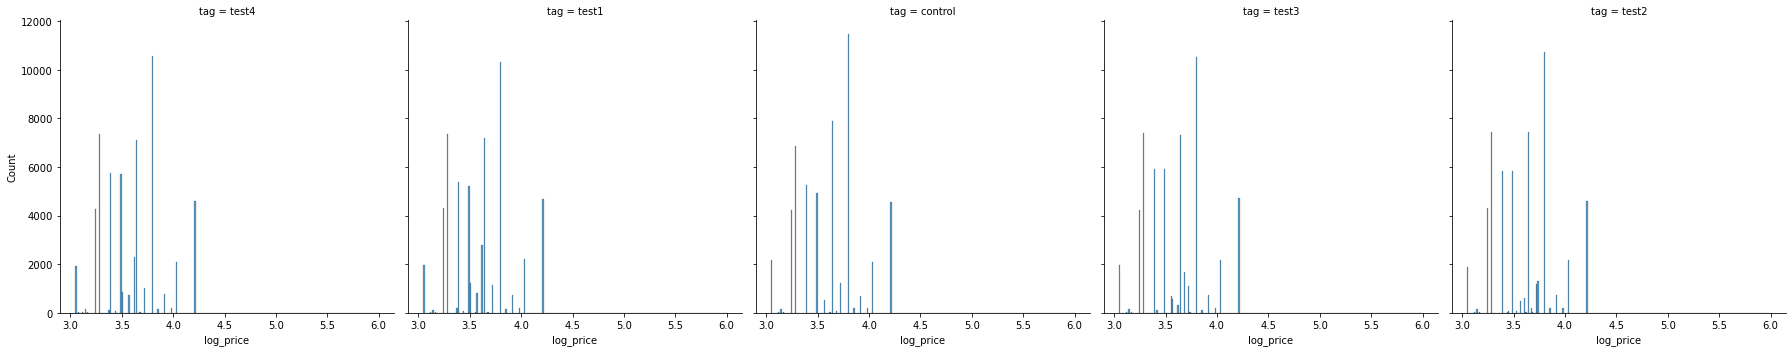

In [244]:
sns.displot(df_after, x='log_price', col='tag')

In [257]:
stats.shapiro(df_after.query("time > 0 and tag == 'control'").log_price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9431525468826294, pvalue=3.8539991345252423e-19)

In [258]:
stats.shapiro(df_after.query("time > 0 and tag == 'test1'").log_price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9433098435401917, pvalue=4.0986171211724864e-19)

In [259]:
stats.shapiro(df_after.query("time > 0 and tag == 'test2'").log_price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9456558227539062, pvalue=1.0420693143948097e-18)

In [260]:
stats.shapiro(df_after.query("time > 0 and tag == 'test3'").log_price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9410325884819031, pvalue=1.7012215237950672e-19)

In [261]:
stats.shapiro(df_after.query("time > 0 and tag == 'test4'").log_price.sample(1000, random_state=17))

ShapiroResult(statistic=0.9475604295730591, pvalue=2.271574033281379e-18)

In [265]:
stats.levene(df_after.query("time > 0 and tag == 'control'").log_price,
            df_after.query("time > 0 and tag == 'test1'").log_price,
            df_after.query("time > 0 and tag == 'test2'").log_price,
            df_after.query("time > 0 and tag == 'test3'").log_price,
            df_after.query("time > 0 and tag == 'test4'").log_price)

LeveneResult(statistic=22.422539672582634, pvalue=1.5428898305169186e-18)

Не соблюдаются требования ни гомогенности дисперсий, ни нормальности распределения. Используем непараметрический критерий Краскела-Уоллиса

In [266]:
stats.kruskal(df_after.query("time > 0 and tag == 'control'").price,
            df_after.query("time > 0 and tag == 'test1'").price,
            df_after.query("time > 0 and tag == 'test2'").price,
            df_after.query("time > 0 and tag == 'test3'").price,
            df_after.query("time > 0 and tag == 'test4'").price)

KruskalResult(statistic=56.42483115599593, pvalue=1.633319186149783e-11)

Разница между группами есть. Проведем пост-хок тест Данна, чтобы понять, в каких именно группах значение отличается от контроля

In [270]:
import scikit_posthocs as sp 

In [272]:
sp.posthoc_dunn(df_after.query("time > 0"), 'price', 'tag', p_adjust='holm')

,control,test1,test2,test3,test4
control,1.000000e+00,6.721190e-08,0.023188,0.001372,1.326906e-10
test1,6.721190e-08,1.000000e+00,0.012014,0.111877,6.226013e-01
test2,2.318764e-02,1.201440e-02,1.000000,0.622601,3.921002e-04
test3,1.371680e-03,1.118773e-01,0.622601,1.000000,1.201440e-02
test4,1.326906e-10,6.226013e-01,0.000392,0.012014,1.000000e+00


Средний чек в каждой группе статистически значимо отличается от контроля. УКАЗАТЬ НА СКОЛЬКО ПРОЦЕНТОВ КАЖДАЯ ГРУППА

Посчитаем ARPU и посмотрим, отличаются ли значения статистически значимо

In [280]:
df_arpu = df_after
df_arpu['price'] = df_arpu['price'].fillna(0)

C:\Users\Работа\AppData\Local\Temp\ipykernel_27528\940742685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arpu['price'] = df_arpu['price'].fillna(0)


In [281]:
df_arpu

,tag,ts,user_uid,registration_time,conv_ts,time,consumption_mode,element_uid,price,converted,log_price
1,test4,30132.310515,3e43107d2ef71e6193c0c17b823d7fc7,28548.288255,30036.408738,NaN,NaN,NaN,0.000000,0,NaN
2,test1,30132.310518,17b970007a7de34840553d8580f7b70f,27162.684422,29474.120954,NaN,NaN,NaN,0.000000,0,NaN
3,test4,30132.310518,c4a3b1c9ba0bfa94dd716c7bdfc88f4a,26613.915607,29954.917754,NaN,NaN,NaN,0.000000,0,NaN
7,control,30132.310522,17250fbf4fa71b476745bcd7ba9ca2c5,29835.669735,29834.311099,NaN,NaN,NaN,0.000000,0,NaN
8,control,30132.310527,42da75b249e981f185ba24a78b79bb8f,25873.682072,25873.781408,30135.547423,rent,6a5064ea3c87c56be05c3fdb85c45b14,26.823529,1,3.289279
...,...,...,...,...,...,...,...,...,...,...,...
1059936,test1,30158.508308,ee83f54307536d016f49949559b2c39d,29388.961386,29392.629971,NaN,NaN,NaN,0.000000,0,NaN
1059937,test3,30158.508421,af59dfe5815ba28b44ec29bb7ef37704,28831.676539,28929.761186,NaN,NaN,NaN,0.000000,0,NaN
1059938,test2,30158.508480,2a3d5dcfc68082de47adc60ed31355f2,29016.189202,29024.290727,NaN,NaN,NaN,0.000000,0,NaN
1059941,test1,30158.508659,cc8efddd0c1955e731f006e809887d2b,29390.601947,29417.077266,NaN,NaN,NaN,0.000000,0,NaN


In [288]:
df_arpu = df_arpu.groupby('user_uid', as_index=False).agg({'tag': 'max', 'price': 'sum'})

In [289]:
df_arpu

,user_uid,tag,price
0,0000290ca105fab1223c088bf54b918c,test4,0.0
1,0000531b60feb84cd57bff4b148f5d24,test4,0.0
2,000066786fe7af9c8ac458b4551dee26,test2,0.0
3,000072bcb4ba240680daa158bcd4d045,test1,0.0
4,0000e9e72d3714c9d4c5ad4b233ea6f5,test4,0.0
...,...,...,...
552925,ffffab957993a6060f681d19dfac6579,test3,0.0
552926,ffffc093e6ad8a606ade54eea7f821b1,test4,68.0
552927,ffffc395f4f1fe23e6ab642f72d2be46,control,0.0
552928,ffffe9d7f6b4a76faf45d84c9032d5f5,test1,0.0


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

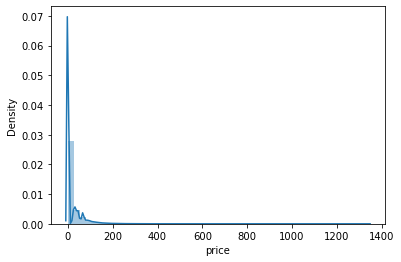

In [290]:
sns.distplot(df_arpu.price)

In [291]:
df_arpu.groupby('tag').agg({'price': 'mean'})

,price
tag,
control,18.568553
test1,19.463202
test2,19.358243
test3,19.423736
test4,19.323451


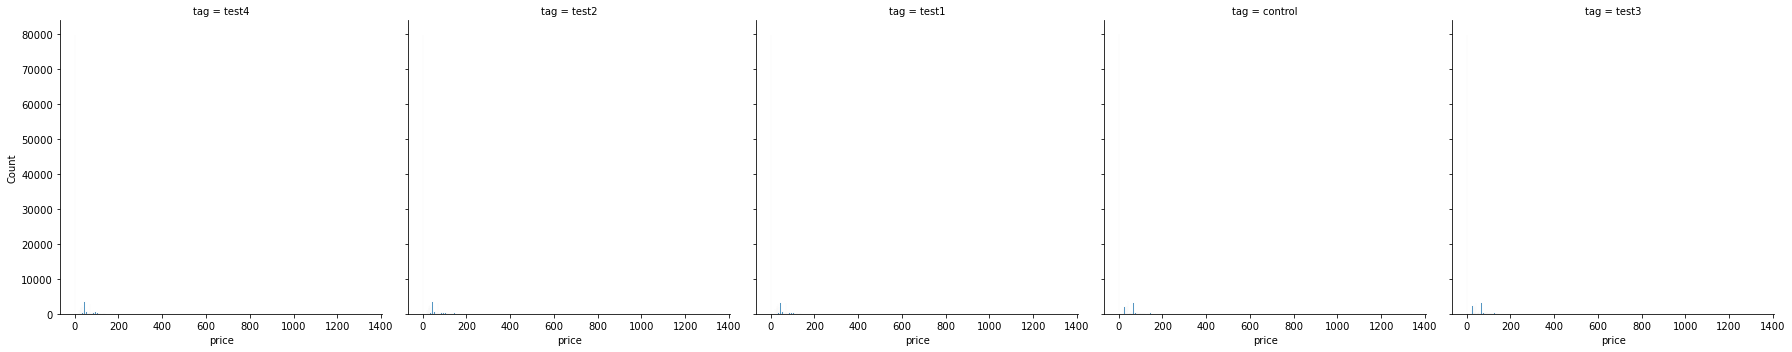

In [292]:
sns.displot(df_arpu, x='price', col='tag')

Распределения явно отличаются от нормального, логарифмирование бессмысленно, так как логарифм нуля не определен. Проверим статистическую значимость различий непараметрическим тестом

In [293]:
stats.kruskal(df_arpu.query("tag == 'control'").price,
             df_arpu.query("tag == 'test1'").price,
             df_arpu.query("tag == 'test2'").price,
             df_arpu.query("tag == 'test3'").price,
             df_arpu.query("tag == 'test4'").price)

KruskalResult(statistic=33.69016622766435, pvalue=8.625651977020635e-07)

Отличия между граппами значимы. Посмотрим, между какими именно

In [294]:
sp.posthoc_dunn(df_arpu, 'price', 'tag', p_adjust='holm')

,control,test1,test2,test3,test4
control,1.000000,0.000001,0.000581,0.000145,0.000159
test1,0.000001,1.000000,1.000000,1.000000,1.000000
test2,0.000581,1.000000,1.000000,1.000000,1.000000
test3,0.000145,1.000000,1.000000,1.000000,1.000000
test4,0.000159,1.000000,1.000000,1.000000,1.000000


В каждой из тестовых групп ARPU выросла статистически значимо. УКАЗАТЬ ПРОЦЕНТЫ

Посмотрим на ARPPU

In [299]:
df_arppu = df_after.query("time > 0")

In [300]:
df_arppu = df_arppu.groupby('user_uid').agg({'tag': 'max', 'price': 'sum'})

In [301]:
df_arppu.groupby('tag').agg({'price': 'mean'})

,price
tag,
control,68.124846
test1,68.969593
test2,69.323970
test3,69.403447
test4,69.013658


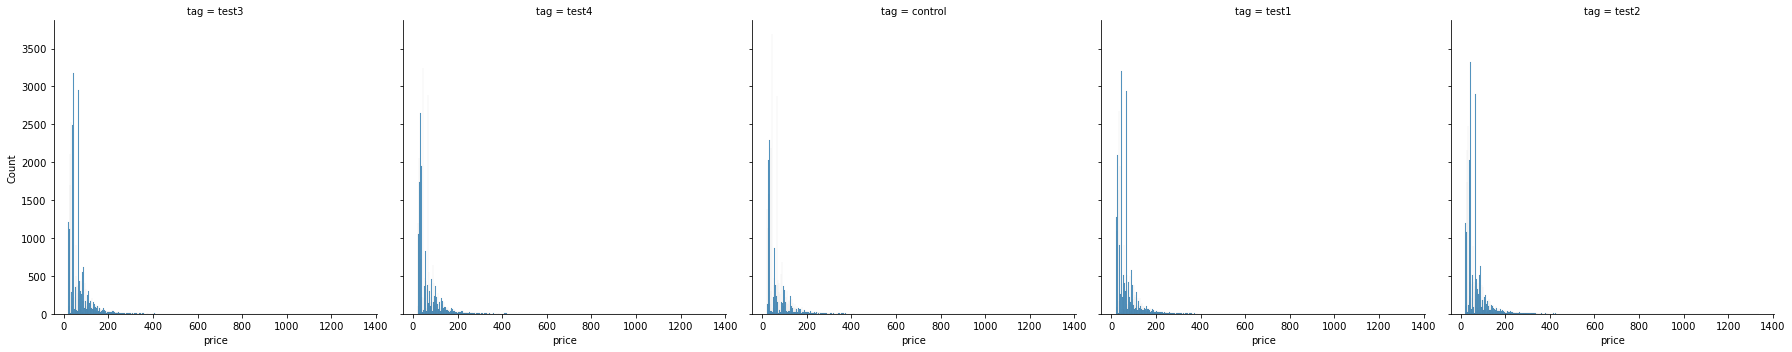

In [302]:
sns.displot(df_arppu, x='price', col='tag')

In [303]:
stats.kruskal(df_arppu.query("tag == 'control'").price,
             df_arppu.query("tag == 'test1'").price,
             df_arppu.query("tag == 'test2'").price,
             df_arppu.query("tag == 'test3'").price,
             df_arppu.query("tag == 'test4'").price)

KruskalResult(statistic=11.514707217307247, pvalue=0.02134960003394415)

In [304]:
sp.posthoc_dunn(df_arppu, 'price', 'tag', p_adjust='holm')

,control,test1,test2,test3,test4
control,1.000000,0.456226,0.057594,0.024516,0.121991
test1,0.456226,1.000000,1.000000,1.000000,1.000000
test2,0.057594,1.000000,1.000000,1.000000,1.000000
test3,0.024516,1.000000,1.000000,1.000000,1.000000
test4,0.121991,1.000000,1.000000,1.000000,1.000000


стат значимо ARPPU вырос только для третьей тестовой группы. УКАЗАТЬ ПРОЦЕНТ! 

Выводы: такие-то метрики значимо выросли, такие-то не изменились стат значимо. Стоит подумать, как поднять метрики, которые не изменились

Каких данных не хватает: 1) норм данных по дате, чтобы посчитать удержание; 2) типа подписки (месячная, полугодовая, годовая), чтобы посмотреть динамику конверсий в них; 3) данных по удовлетворенностью новой системы оплаты, чтобы посчитать CSI